
# 자동차 구매 가격 예측



# PROBLEM STATEMENT

다음과 같은 컬럼을 가지고 있는 데이터셋을 읽어서, 어떠한 고객이 있을때, 그 고객이 얼마정도의 차를 구매할 수 있을지를 예측하여, 그 사람에게 맞는 자동차를 보여주려 한다. 

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth (순자산)

예측하고자 하는 값 : 
- Car Purchase Amount 

# STEP #0: 라이브러리 임포트 및 코랩 환경 설정

[구글 드라이브 파일 읽기 참고](https://vision-ai.tistory.com/entry/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C%EC%9D%98-csv-%ED%8C%8C%EC%9D%BC-%EC%9D%BD%EA%B8%B0)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### csv 파일을 읽기 위해, 구글 드라이브 마운트 하시오

### working directory 를, 현재의 파일이 속한 폴더로 셋팅하시오.

# STEP #1: IMPORT DATASET

### Car_Purchasing_Data.csv 파일을 사용한다.  코랩의 경우 구글드라이브의 전체경로를 복사하여 파일 읽는다. 

### 인코딩은 다음처럼 한다. encoding='ISO-8859-1'

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


### 컬럼을 확인하고

### 기본 통계 데이터를 확인해 보자

In [3]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


### 연봉이 가장 높은 사람은 누구인가

In [4]:
car_df.loc[ car_df['Annual Salary'] == car_df['Annual Salary'].max(), ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


### 나이가 가장 어린 고객은, 연봉이 얼마인가

In [5]:
car_df.loc[ car_df['Age'] == car_df['Age'].min(), ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),1,20.0,70467.29492,100.0,494606.6334,28645.39425


# STEP #2: VISUALIZE DATASET

### 상관관계를 분석하기 위해, pairplot 을 그려보자.

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING




### NaN 값이 있으면, 이를 해결하시오.

In [6]:
car_df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 학습을 위해 'Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount' 컬럼을 제외한 컬럼만, X로 만드시오.

In [7]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
X = car_df.iloc[ :, 4: -2+1]

### y 값은 'Car Purchase Amount' 컬럼으로 셋팅하시오.

In [9]:
y = car_df['Car Purchase Amount']

### 피처 스케일링 하겠습니다. 정규화(normalization)를 사용합니다. MinMaxScaler 를 이용하시오.

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mm = MinMaxScaler()

In [12]:
X = mm.fit_transform(X)

### 학습을 위해서, y 의 shape 을 변경하시오.

In [13]:
y.shape

(500,)

In [14]:
# 현재 y는 pandas.core.series.Series 인데 shape변경을 하려면
# reshape를 해야하는데 이것은 판다스에 없다. numpy에 있으므로 
# pandas 자체는 numpy로 되어 있기 때문에 
# values 속성을 이용해서 값들도 다시 저장해주면 
# 넘파이 배열이 되어서 numpy.ndarray
# 드디어 reshape을 할 수 있음
y = y.values

In [15]:
type(y)

numpy.ndarray

In [16]:
y = y.reshape(-1, 1)

### y 도 피처 스케일링 하겠습니다. X 처럼 y도 노멀라이징 하시오.

In [17]:
mm_y = MinMaxScaler()

In [18]:
y = mm_y.fit_transform(y)

# STEP#4: TRAINING THE MODEL

### 트레이닝셋과 테스트셋으로 분리하시오. (테스트 사이즈는 25%로 하며, 동일 결과를 위해 랜덤스테이트는 50 으로 셋팅하시오.)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8282)

### 아래 라이브러리를 임포트 하시오

In [21]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

### 딥러닝을 이용한 모델링을 하시오.

In [22]:
model = Sequential()

In [23]:
X.shape

(500, 4)

In [24]:
model.add( Dense( input_dim = 4, units = 4, activation='relu') )

In [25]:
model.add( Dense( units=1, activation='sigmoid') ) 

### 옵티마이저는 'adam' 으로 하고, 로스펑션은 'mean_squared_error' 로 셋팅하여 컴파일 하시오

In [26]:
#metrics=['accuracy'] 2개의 분류 일 때만 사용
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'] )


### 학습을 진행하시오.

In [29]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
38/38 [==============================] - 0s 892us/step - loss: 0.0143 - accuracy: 0.0027
Epoch 2/20
38/38 [==============================] - 0s 898us/step - loss: 0.0140 - accuracy: 0.0027
Epoch 3/20
38/38 [==============================] - 0s 781us/step - loss: 0.0136 - accuracy: 0.0027
Epoch 4/20
38/38 [==============================] - 0s 800us/step - loss: 0.0133 - accuracy: 0.0027
Epoch 5/20
38/38 [==============================] - 0s 828us/step - loss: 0.0130 - accuracy: 0.0027
Epoch 6/20
38/38 [==============================] - 0s 860us/step - loss: 0.0127 - accuracy: 0.0027
Epoch 7/20
38/38 [==============================] - 0s 766us/step - loss: 0.0123 - accuracy: 0.0027
Epoch 8/20
38/38 [==============================] - 0s 796us/step - loss: 0.0120 - accuracy: 0.0027
Epoch 9/20
38/38 [==============================] - 0s 831us/step - loss: 0.0117 - accuracy: 0.0027
Epoch 10/20
38/38 [==============================] - 0s 888us/step - loss: 0.0114 - accuracy: 0.0027

# STEP#5: EVALUATING THE MODEL 

In [30]:
epochs_hist.history

{'loss': [0.014305596239864826,
  0.013974164612591267,
  0.013646121136844158,
  0.013310960493981838,
  0.012983012944459915,
  0.012660897336900234,
  0.012347343377768993,
  0.01202066894620657,
  0.01170135848224163,
  0.011405115947127342,
  0.011109396815299988,
  0.010792492888867855,
  0.010482892394065857,
  0.010182289406657219,
  0.00990904588252306,
  0.009607942774891853,
  0.009288780391216278,
  0.009024688974022865,
  0.008748134598135948,
  0.008477783761918545],
 'accuracy': [0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077,
  0.0026666666381061077]}

### 테스트셋으로 예측을 해 보시오.

In [28]:
y_pred = model.predict(X_test)

### 실제값과 예측값을 plot 으로 나타내시오.

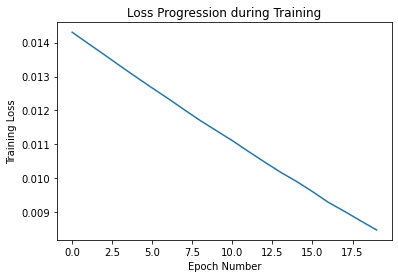

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.title('Loss Progression during Training')
plt.xlabel('Epoch Number')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
# 예측 값을 data 프레임으로 만들어서 보기

In [ ]:
# 한번 해보기 
#ret_df = pd.DataFrame( {'실제값': y_test.reshape(-1, ), '예측값': y_pred.reshape(-1, ) } )

In [ ]:
# 차트 그리기

# plt.figure(figsize=(10,8))
# plt.plot(ret_df['실제값'],'g-')
# plt.plot(ret_df['예측값'],'b-')
# plt.show()

### MSE 를 계산하시오.

In [ ]:
# y_pred 의 결과는 0, 1 사이의 값만 나옴

# 피쳐 스케일링을 했기 때문에 MinMaxScaler

In [ ]:
#((y_test - y_pred) **2).mean()


### 새로운 고객 데이터가 있습니다. 이 사람은 차량을 얼마정도 구매 가능한지 예측하시오.

### 여자이고, 나이는 38, 연봉은 90000,  카드빚은 2000, 순자산은 500000 일때, 어느정도의 차량을 구매할 수 있을지 예측하시오.